In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
import csv

### Pre-Processing for Train Set

In [2]:
from sklearn import preprocessing
# Preprocessing for Train set
data_train = pd.read_csv("train.csv")
column_means = data_train.mean()
data_train = data_train.fillna(column_means)

# Converting Columns of string value into integers
data_train['Gender'] = data_train['Gender'].replace(to_replace = ['Male', 'Female'], value = ['0', '1'])
data_train['Customer Type'] = data_train['Customer Type'].replace(to_replace = ['Loyal Customer', 'disloyal Customer'], value = ['0', '1'])
data_train['Type of Travel'] = data_train['Type of Travel'].replace(to_replace = ['Personal Travel', 'Business travel'], value = ['0', '1'])
data_train['Class'] = data_train['Class'].replace(to_replace = ['Eco Plus', 'Business', 'Eco'], value = ['0', '1', '2'])
data_train['satisfaction'] = data_train['satisfaction'].replace(to_replace = ['neutral or dissatisfied', 'satisfied'], value = ['0', '1'])

# Normalize dataset
scaler = preprocessing.MinMaxScaler()
names = data_train.columns
d = scaler.fit_transform(data_train)
data_train = pd.DataFrame(d, columns=names)

x_train = data_train.iloc[0:,2:24]  #independent columns
y_train = data_train.iloc[0:,24]    #target column i.e price range

C:\Users\rahul\AppData\Local\Temp/ipykernel_128212/2940425374.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_means = data_train.mean()


### Pre-Processing for Test Set

In [3]:
# Preprocessing for Test set
data_test = pd.read_csv("test.csv")
column_means = data_test.mean()
data_test = data_test.fillna(column_means)

# Converting Columns of string value into integers
data_test['Gender'] = data_test['Gender'].replace(to_replace = ['Male', 'Female'], value = ['0', '1'])
data_test['Customer Type'] = data_test['Customer Type'].replace(to_replace = ['Loyal Customer', 'disloyal Customer'], value = ['0', '1'])
data_test['Type of Travel'] = data_test['Type of Travel'].replace(to_replace = ['Personal Travel', 'Business travel'], value = ['0', '1'])
data_test['Class'] = data_test['Class'].replace(to_replace = ['Eco Plus', 'Business', 'Eco'], value = ['0', '1', '2'])
data_test['satisfaction'] = data_test['satisfaction'].replace(to_replace = ['neutral or dissatisfied', 'satisfied'], value = ['0', '1'])

# Normalize dataset
scaler = preprocessing.MinMaxScaler()
names = data_test.columns
d = scaler.fit_transform(data_test)
data_test = pd.DataFrame(d, columns=names)

x_test = data_test.iloc[0:,2:24]  #independent columns
y_test = data_test.iloc[0:,24]    #target column i.e price range

C:\Users\rahul\AppData\Local\Temp/ipykernel_128212/2891492377.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_means = data_test.mean()


## 1. Univariate Selection

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=22)
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(22,'Score'))  #print 22 features

                                Specs        Score
3                      Type of Travel  6501.443676
1                       Customer Type  2989.976064
11                    Online boarding  2952.391444
13             Inflight entertainment  1742.236390
5                     Flight Distance  1607.651121
4                               Class  1465.868356
12                       Seat comfort  1283.852065
6               Inflight wifi service  1084.466796
14                   On-board service  1059.867470
15                   Leg room service  1052.395323
19                        Cleanliness  1014.275278
16                   Baggage handling   844.818830
17                    Checkin service   561.688952
10                     Food and drink   505.582647
18                   Inflight service   472.589351
8              Ease of Online booking   434.904989
2                                 Age   176.838169
7   Departure/Arrival time convenient    42.052029
21           Arrival Delay in M

## 2. Feature Importance

[0.00663909 0.05833645 0.02295693 0.14572837 0.07845698 0.02491599
 0.13592806 0.01937244 0.04213378 0.0175222  0.01380344 0.11082411
 0.04779828 0.05490297 0.03704378 0.03278346 0.03392773 0.0312742
 0.02974879 0.03393537 0.01083553 0.01113205]


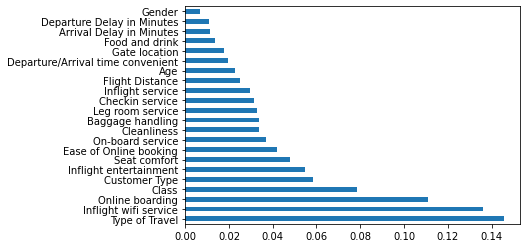

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

## 3.Correlation Matrix with Heatmap

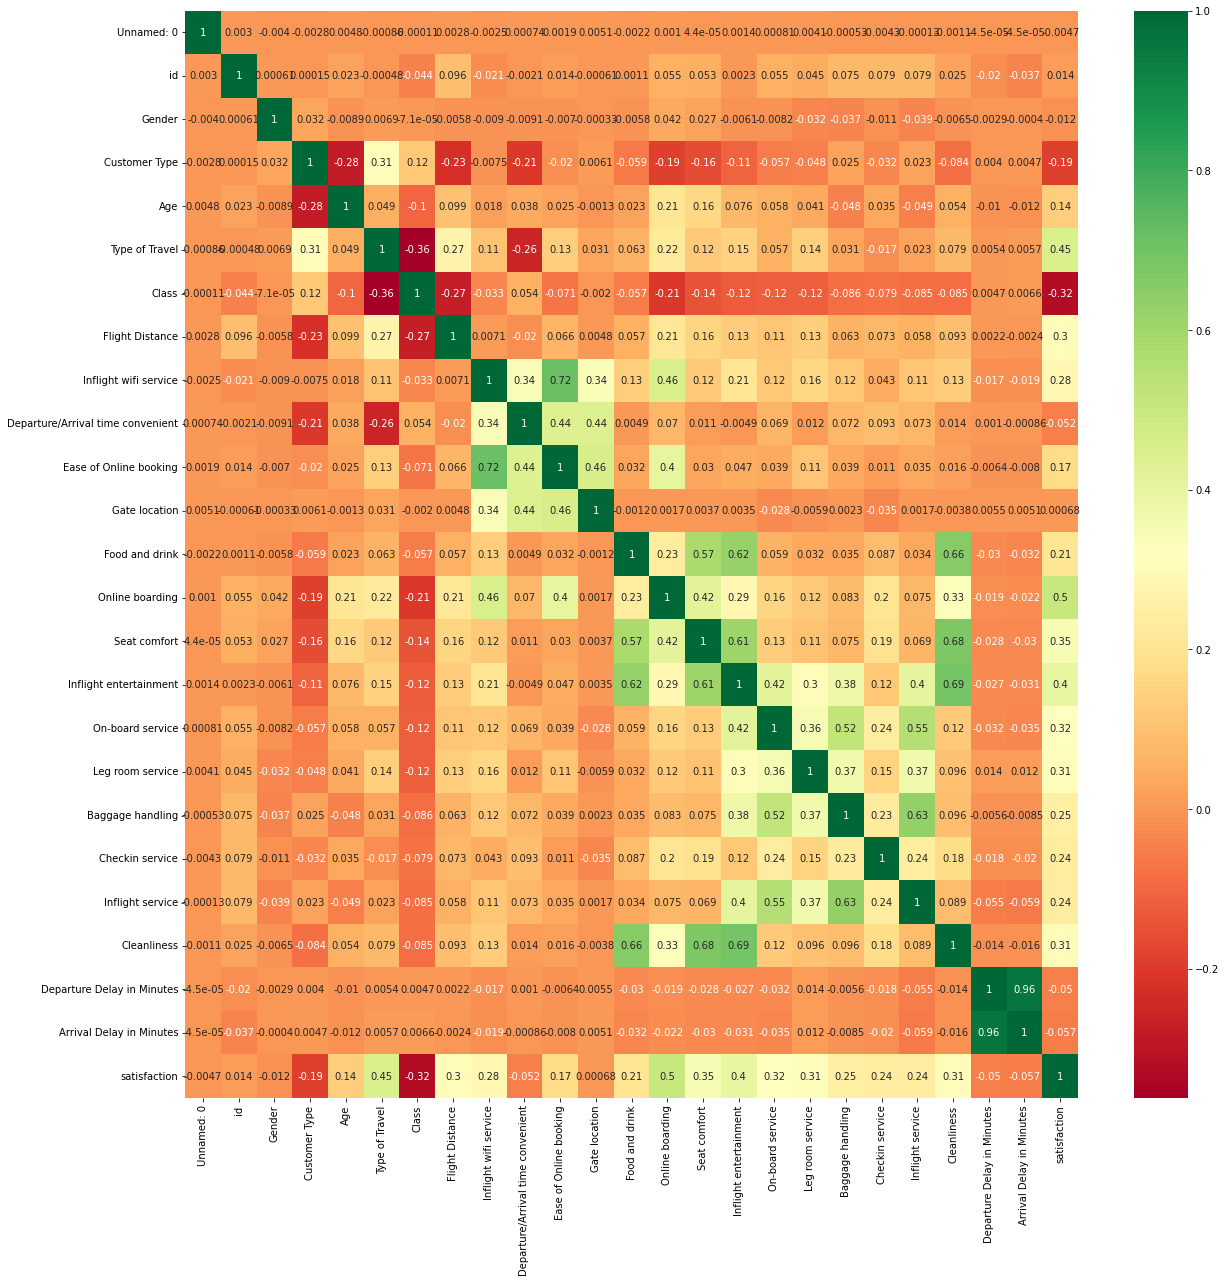

In [6]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = data_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Decision Tree

In [7]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

begin_time = time.time()
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
end_time = time.time()
time_taken = end_time - begin_time
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("time taken for the Decision Tree classifier:",time_taken)

Accuracy: 0.93032029565753
time taken for the Decision Tree classifier: 0.8108296394348145


### KNN

In [8]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

begin_time = time.time()

neigh = KNeighborsClassifier(n_neighbors=3)
neigh = neigh.fit(x_train, y_train)

y_pred_knn = neigh.predict(x_test)
end_time = time.time()
time_taken = end_time - begin_time

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("time taken for the KNN classifier:",time_taken)

Accuracy: 0.9258931321219588
time taken for the KNN classifier: 40.26033687591553


### Support Vector Machine

In [9]:
# Support Vector Machine
from sklearn.svm import SVC
begin_time = time.time()
svclassifier = SVC(kernel='rbf')
svc = svclassifier.fit(x_train, y_train)
y_prediction = svc.predict(x_test)
end_time = time.time()
time_taken = end_time - begin_time

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_prediction))
print("time taken for the SVM classifier:",time_taken)

Accuracy: 0.9506082537727133
time taken for the SVM classifier: 255.65030789375305


### Random Forest

In [10]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
begin_time = time.time()
rclf=RandomForestClassifier(n_estimators=100)
rclf = rclf.fit(x_train,y_train)
y_pred_rf = rclf.predict(x_test)
end_time = time.time()
time_taken = end_time - begin_time
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("time taken for the Random Forest classifier:",time_taken)

Accuracy: 0.9586926393594087
time taken for the SVM classifier: 13.771179676055908


### Creating new Training & Testing dataset based on the Best Features

In [11]:
# Create new training & testing dataset based on best features
remove_features = {'Gate location', 'Gender', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient', 'Age', 'Inflight service', 'Food and drink', 'Checkin service', 'Flight Distance'}
x_train_feature = x_train.drop(remove_features,axis=1)
x_test_feature = x_test.drop(remove_features,axis=1)
print(x_train_feature)


        Customer Type  Type of Travel  Class  Inflight wifi service  \
0                 0.0             0.0    0.0                    0.6   
1                 1.0             1.0    0.5                    0.6   
2                 0.0             1.0    0.5                    0.4   
3                 0.0             1.0    0.5                    0.4   
4                 0.0             1.0    0.5                    0.6   
...               ...             ...    ...                    ...   
103899            1.0             1.0    1.0                    0.4   
103900            0.0             1.0    0.5                    0.8   
103901            1.0             1.0    0.5                    0.2   
103902            1.0             1.0    1.0                    0.2   
103903            0.0             1.0    0.5                    0.2   

        Ease of Online booking  Online boarding  Seat comfort  \
0                          0.6              0.6           1.0   
1                

### Decision Tree for Best Features

In [12]:
# Decision Tree for best features
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
begin_time = time.time()
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train_feature,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_feature)

end_time = time.time()
time_taken = end_time - begin_time

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("time taken for the Decision Tree classifier:",time_taken)

Accuracy: 0.931821681552202
time taken for the Decision Tree classifier: 0.2862584590911865


### KNN for the Best Features

In [13]:
# KNN for best features
from sklearn.neighbors import KNeighborsClassifier
begin_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh = neigh.fit(x_train_feature, y_train)

y_pred_knn = neigh.predict(x_test_feature)
end_time = time.time()
time_taken = end_time - begin_time
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("time taken for the KNN classifier:",time_taken)

Accuracy: 0.9359793655682168
time taken for the KNN classifier: 24.082618236541748


### Support Vector MAchine for the Best Features

In [14]:
# Support Vector Machine for best features
from sklearn.svm import SVC
begin_time = time.time()
svclassifier = SVC(kernel='rbf')
svclassifier = svclassifier.fit(x_train_feature, y_train)
y_pred_svm = svclassifier.predict(x_test_feature)
end_time = time.time()
time_taken = end_time - begin_time
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("time taken for the SVM classifier:",time_taken)

Accuracy: 0.947143517092701
time taken for the SVM classifier: 203.88277006149292


### Random Forest for the Best Features

In [15]:
# Random Forest for best features
from sklearn.ensemble import RandomForestClassifier
begin_time = time.time()
rclf=RandomForestClassifier(n_estimators=100)
rclf = rclf.fit(x_train_feature,y_train)
y_pred_rf = rclf.predict(x_test_feature)
end_time = time.time()
time_taken = end_time - begin_time
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("time taken for the Random Forest classifier:", time_taken)

Accuracy: 0.943601786264244
time taken for the Random Forest classifier: 8.205085277557373
